In [1]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
!unzip bank+marketing.zip 
!unzip bank.zip

--2024-12-16 11:00:49--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [    <=>             ] 999,85K  1021KB/s    in 1,0s    

2024-12-16 11:00:53 (1021 KB/s) - ‘bank+marketing.zip’ saved [1023843]

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


### Using the file "bank-full.csv"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [12]:
df = pd.read_csv("./bank-full.csv", delimiter=";")

In [13]:
cols_used = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

In [14]:
df = df[cols_used]

In [64]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train['y'] == 'yes').astype(int)
y_val = (df_val['y'] == 'yes').astype(int)
y_test = (df_test['y'] == 'yes').astype(int)

del df_train['y']
del df_val['y']
del df_test['y']

In [66]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [67]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [50]:
df.dtypes[df.dtypes != 'object']

age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

In [68]:
numerical = df.dtypes[df.dtypes != 'object'].index
numerical

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [53]:
# numerical = [x[0] for x in zip(df_train.columns, df_train.dtypes) if x[1]=='int64']
# categorical = [x[0] for x in zip(df_train.columns, df_train.dtypes) if x[1]!='int64']
# numerical, categorical

# Q1

In [76]:
from sklearn.metrics import roc_auc_score


In [137]:
list_score = []
for num_col in numerical:
    score = roc_auc_score(y_train, df_train[num_col])
    if score < 0.5:
        score = roc_auc_score(y_train, -df_train[num_col])
    print(f"Column name: {num_col}, AUC: {score}")
    list_score.append((num_col, score))

Column name: age, AUC: 0.5089264216372754
Column name: balance, AUC: 0.5901980570148335
Column name: day, AUC: 0.5268024178424807
Column name: duration, AUC: 0.8107326653990876
Column name: campaign, AUC: 0.5732973412146501
Column name: pdays, AUC: 0.5911224194439639
Column name: previous, AUC: 0.600722053956684


# Q2

In [78]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [79]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [84]:
roc_auc_score(y_val, y_pred)

0.8999653998756322

# Q3

In [88]:
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [89]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()


        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    return df_scores

In [90]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [100]:
df_scores['precision'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
df_scores['recall'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])

In [101]:
df_scores

,threshold,tp,fp,fn,tn,p,r,precise,recall,precision
0,0.00,1098,7944,0,0,0.121433,1.000000,0.121433,1.000000,0.121433
1,0.01,1094,6956,4,988,0.135901,0.996357,0.135901,0.996357,0.135901
2,0.02,1093,5768,5,2176,0.159306,0.995446,0.159306,0.995446,0.159306
3,0.03,1086,4738,12,3206,0.186470,0.989071,0.186470,0.989071,0.186470
4,0.04,1067,3778,31,4166,0.220227,0.971767,0.220227,0.971767,0.220227
...,...,...,...,...,...,...,...,...,...,...
96,0.96,32,17,1066,7927,0.653061,0.029144,0.653061,0.029144,0.653061
97,0.97,25,15,1073,7929,0.625000,0.022769,0.625000,0.022769,0.625000
98,0.98,22,10,1076,7934,0.687500,0.020036,0.687500,0.020036,0.687500
99,0.99,10,6,1088,7938,0.625000,0.009107,0.625000,0.009107,0.625000


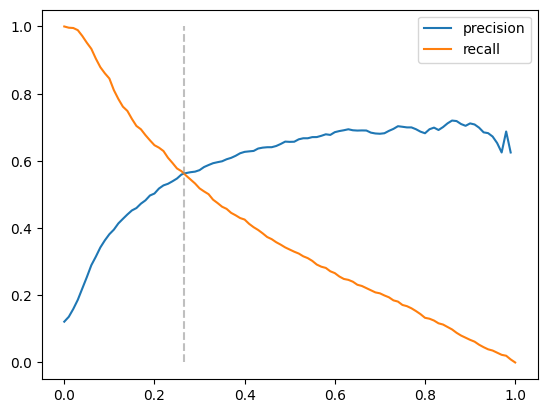

In [102]:
plt.plot(df_scores['threshold'], df_scores['precision'], label='precision')
plt.plot(df_scores['threshold'], df_scores['recall'], label='recall')

plt.vlines(0.265, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

# Q4

In [103]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)

df_scores['precision'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
df_scores['recall'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])

df_scores['f1'] = 2 * (df_scores['precision'] * df_scores['recall']) / (df_scores['precision'] + df_scores['recall'])

In [109]:
df_scores

,threshold,tp,fp,fn,tn,precision,recall,f1
0,0.00,1098,7944,0,0,0.121433,1.000000,0.216568
1,0.01,1094,6956,4,988,0.135901,0.996357,0.239178
2,0.02,1093,5768,5,2176,0.159306,0.995446,0.274658
3,0.03,1086,4738,12,3206,0.186470,0.989071,0.313782
4,0.04,1067,3778,31,4166,0.220227,0.971767,0.359078
...,...,...,...,...,...,...,...,...
96,0.96,32,17,1066,7927,0.653061,0.029144,0.055798
97,0.97,25,15,1073,7929,0.625000,0.022769,0.043937
98,0.98,22,10,1076,7934,0.687500,0.020036,0.038938
99,0.99,10,6,1088,7938,0.625000,0.009107,0.017953


In [108]:
df_scores.iloc[df_scores['f1'].idxmax()]

threshold       0.220000
tp            691.000000
fp            620.000000
fn            407.000000
tn           7324.000000
precision       0.527079
recall          0.629326
f1              0.573682
Name: 22, dtype: float64

# Q5

In [135]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tqdm.auto import tqdm

In [111]:
def train(df_train, y_train, C=0.1, max_iter=1000):
    dicts = df_train.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=max_iter)
    model.fit(X_train, y_train)
    
    return dv, model

In [112]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [124]:
(df_full_train['y']=='yes').astype(int).sum()

4239

In [132]:
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]    
    df_val = df_full_train.iloc[val_idx]
    
    y_train = (df_train['y'] == 'yes').astype(int)
    y_val = (df_val['y'] == 'yes').astype(int)
    
    del df_train['y']
    del df_val['y']
    
    dv, model = train(df_train, y_train, C=1.0, max_iter=1000)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append(auc)
        
    print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))
    

0.899 +- 0.000
0.899 +- 0.000
0.903 +- 0.006
0.904 +- 0.005
0.906 +- 0.006


# Q6

In [136]:
n_splits = 5

for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]    
        df_val = df_full_train.iloc[val_idx]
        
        y_train = (df_train['y'] == 'yes').astype(int)
        y_val = (df_val['y'] == 'yes').astype(int)
        
        del df_train['y']
        del df_val['y']
        
        dv, model = train(df_train, y_train, C=C, max_iter=1000)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append(auc)
        
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.701 +- 0.009
C=0.001 0.861 +- 0.007
C=1 0.906 +- 0.006
